In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
import numpy as np

from lstm_model import build_model, train_model, save_lstm_model, load_lstm_model
from models.lstm_v3.lstm_normalize import get_lstm_data
from utils.chart import config_chart, plot_model_performance, plot_scatter_data, plot_distribution_data, plot_direction_comparison
from constants import SP500_TICKER
from tensorflow import keras

# import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            67584     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 119651 (467.39 KB)
Trainable params: 119651 (467.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---

## For **train_model** function

In [4]:
train, test, predict= get_lstm_data(SP500_TICKER)

x_train = train["x"] 
y_train = train["y"].astype('uint8')
y_train = keras.utils.to_categorical(y_train, num_classes=3)
# y_train = y_train.reshape(-1, 1)

x_test = test["x"]
y_test = test["y"].astype('uint8')
y_test = keras.utils.to_categorical(y_test, num_classes=3)
# y_test = y_test.reshape(-1, 1)

x_predict = predict["x"]
y_predict = predict["y"].astype('uint8')
y_predict = keras.utils.to_categorical(y_predict, num_classes=3)
# y_predict = y_predict.reshape(-1, 1)


print("Train data:")
print(x_train[0])
print(x_train.shape)
print(y_train)
print(y_train.shape)

print("Test data:")
print(y_test[0])
print(x_test.shape)
print(x_test[0])
print(x_test.shape)

print("Predict data:")
print(x_predict[0])
print(x_predict.shape)
print(y_predict)
print(y_predict.shape)


Train data:
[[1399.05  1421.276 1426.066]
 [1381.52  1418.647 1421.896]
 [1378.02  1414.353 1418.175]
 [1422.45  1411.362 1415.885]
 [1420.6   1406.818 1414.601]]
(4763, 5, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
(4763, 3)
Test data:
[0. 1. 0.]
(595, 5, 3)
[[2917.52  2927.009 2910.661]
 [2945.64  2931.07  2913.973]
 [2932.47  2933.52  2915.96 ]
 [2884.05  2928.557 2915.374]
 [2879.42  2923.774 2915.435]]
(595, 5, 3)
Predict data:
[[4458.58  4514.327 4485.937]
 [4468.73  4510.263 4485.974]
 [4443.05  4501.689 4484.141]
 [4480.7   4497.491 4485.772]
 [4473.75  4492.457 4489.446]]
(596, 5, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(596, 3)


In [5]:
# plt = config_chart('Model Data')
# plt.plot(y_dates_train[:, 0], y_train[:, 0])
# plt.plot(y_dates_test[:, 0], y_test[:, 0])
# plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
# plt.legend(['Train', 'Test','Predict'])

Epoch 1/100


149/149 [==============================] - 4s 5ms/step - loss: 1.0407 - accuracy: 0.4871 - precision_1: 0.5165 - recall_1: 0.2102
Epoch 2/100
149/149 [==============================] - 1s 5ms/step - loss: 1.0369 - accuracy: 0.4991 - precision_1: 0.4971 - recall_1: 0.2360
Epoch 3/100
149/149 [==============================] - 1s 5ms/step - loss: 1.0334 - accuracy: 0.4991 - precision_1: 0.5289 - recall_1: 0.2444
Epoch 4/100
149/149 [==============================] - 1s 5ms/step - loss: 1.0068 - accuracy: 0.5238 - precision_1: 0.5980 - recall_1: 0.2698
Epoch 5/100
149/149 [==============================] - 1s 5ms/step - loss: 0.9134 - accuracy: 0.6139 - precision_1: 0.6720 - recall_1: 0.4461
Epoch 6/100
149/149 [==============================] - 1s 5ms/step - loss: 0.8144 - accuracy: 0.6637 - precision_1: 0.7252 - recall_1: 0.5839
Epoch 7/100
149/149 [==============================] - 1s 5ms/step - loss: 0.7743 - accuracy: 0.6838 - precision_1: 0.7408 - recall_1: 0.6145
Epoc

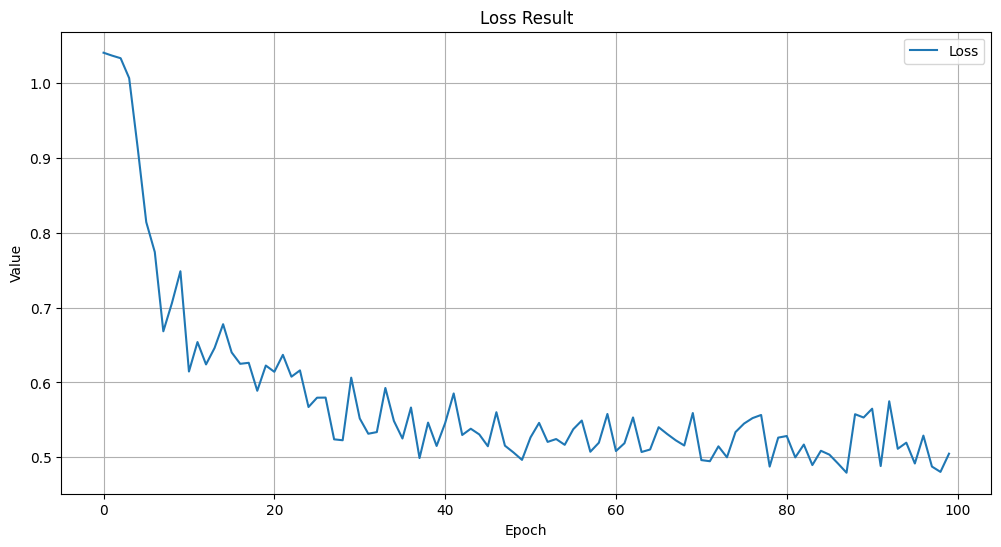

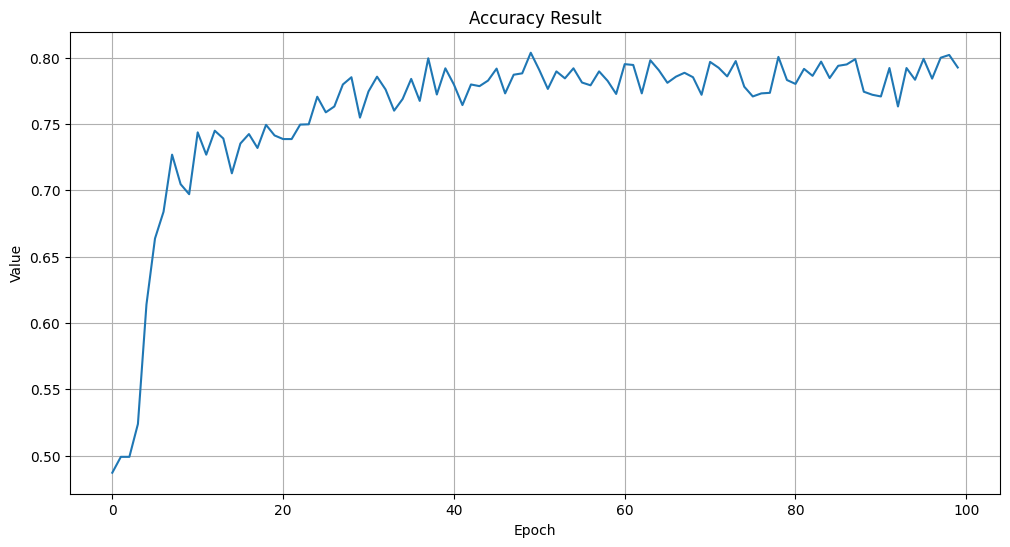

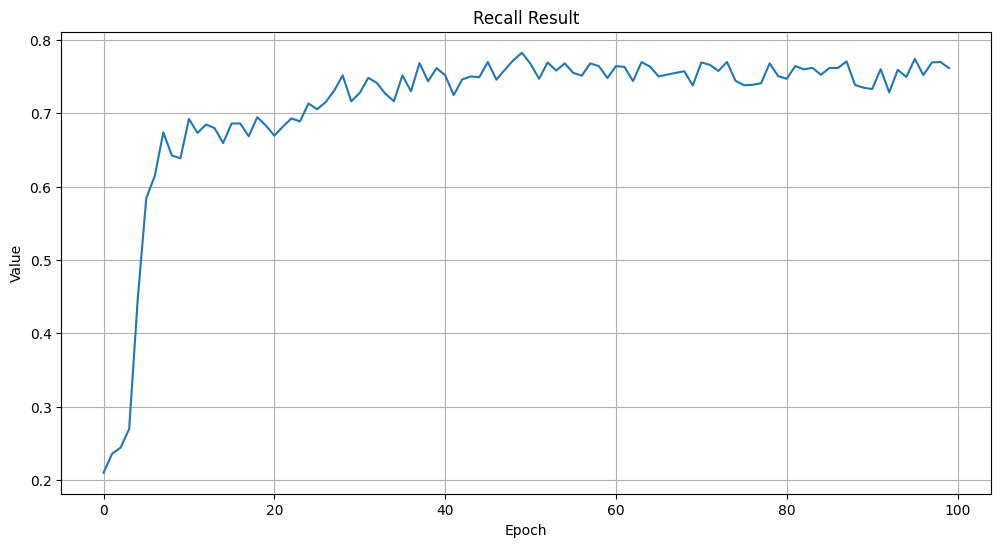

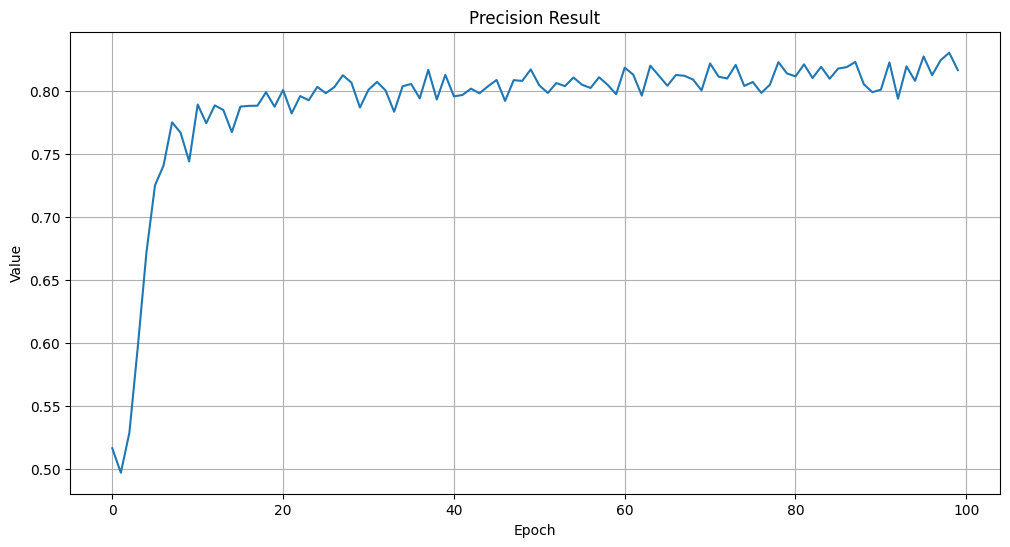

Train result:
Test result:
[0.39639294147491455, 0.8672268986701965, 0.8720136284828186, 0.8588235378265381]


In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test) 

plot_model_performance(fit_result)
# plot_model_performance(evaluate_result)

print("Train result:")
print(fit_result)

print("Test result:")
print(evaluate_result)

save_lstm_model(model)

In [7]:
latest_train_metrics = [value[-1] for key, value in fit_result.history.items()]

print("Train result:")
print("accuracy, loss, precision, recall")
print(latest_train_metrics)

print("Test result:")
print("loss, accuracy, precision, recall")
print(evaluate_result)

Train result:
accuracy, loss, precision, recall
[0.5048118233680725, 0.7925677299499512, 0.8166666626930237, 0.7612848877906799]
Test result:
loss, accuracy, precision, recall
[0.39639294147491455, 0.8672268986701965, 0.8720136284828186, 0.8588235378265381]


In [8]:
model = load_lstm_model()

149/149 [==============================] - 1s 2ms/step


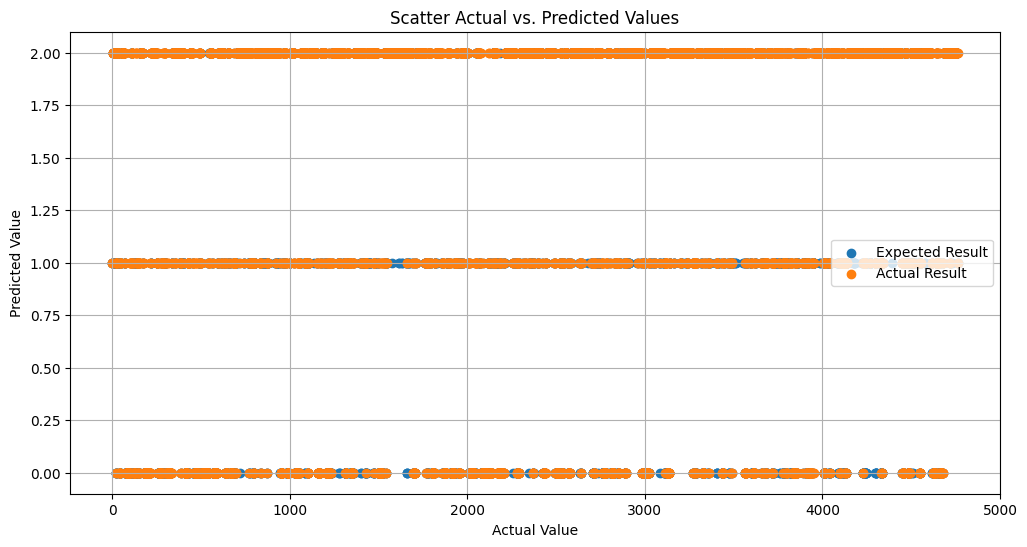

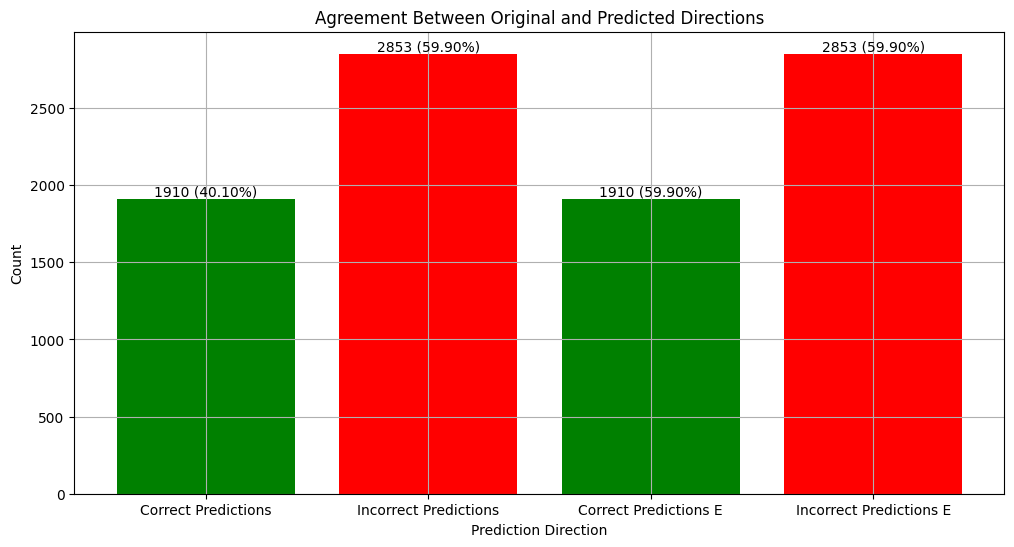

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.0683927 , 0.02186717, 0.00631075, ..., 0.00350949, 0.00361343,
        0.09795377], dtype=float32))

In [9]:
predictions_train = model.predict(x_train)

# plot_scatter_data(y_train[:, 0], predictions_train[:, 0])
y_train_classes = np.argmax(y_train, axis=1)
predictions_train_classes = np.argmax(predictions_train, axis=1)

plot_scatter_data(y_train_classes, predictions_train_classes)
plot_direction_comparison(y_train_classes, predictions_train_classes)

y_train[:, 0], predictions_train[:, 0]

19/19 [==============================] - 0s 2ms/step


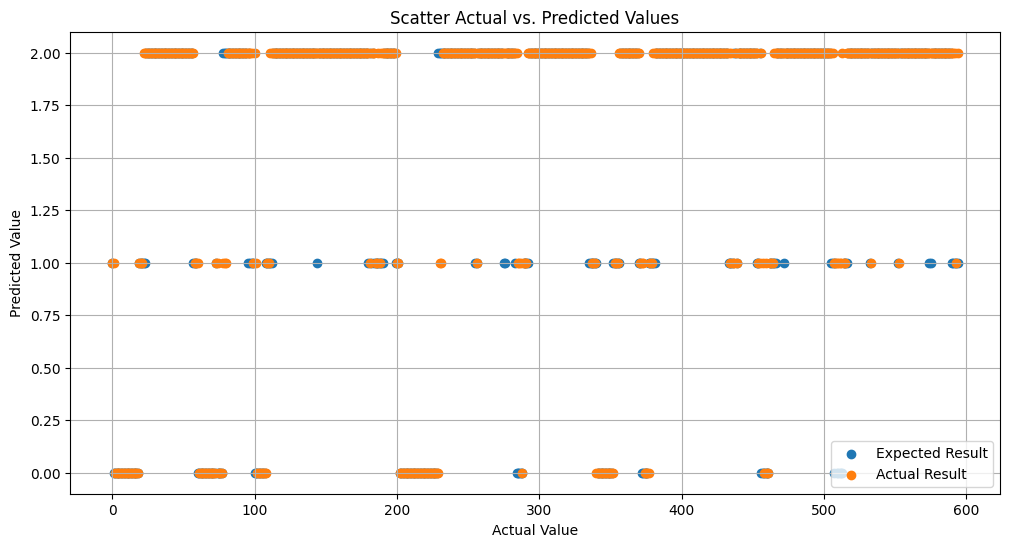

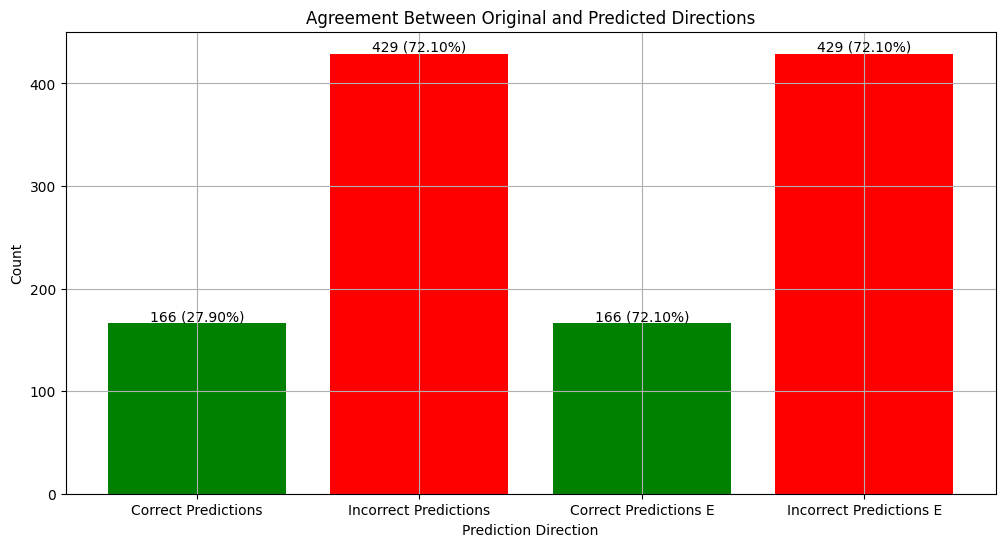

In [10]:
predictions_test = model.predict(x_test)

y_test_classes = np.argmax(y_test, axis=1)
predictions_test_classes = np.argmax(predictions_test, axis=1)

plot_scatter_data(y_test_classes, predictions_test_classes)
plot_direction_comparison(y_test_classes, predictions_test_classes)


19/19 [==============================] - 0s 2ms/step
[[0.04204576 0.24549018 0.7124641 ]
 [0.41375884 0.5223264  0.06391469]
 [0.32581443 0.58649886 0.08768674]
 ...
 [0.00351393 0.06925608 0.92723   ]
 [0.00351394 0.06925625 0.9272299 ]
 [0.00351393 0.06925617 0.9272299 ]]
[2 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 0 0 0 0 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 1 1 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 2 1 1 2 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 2 2 2 2
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 2 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

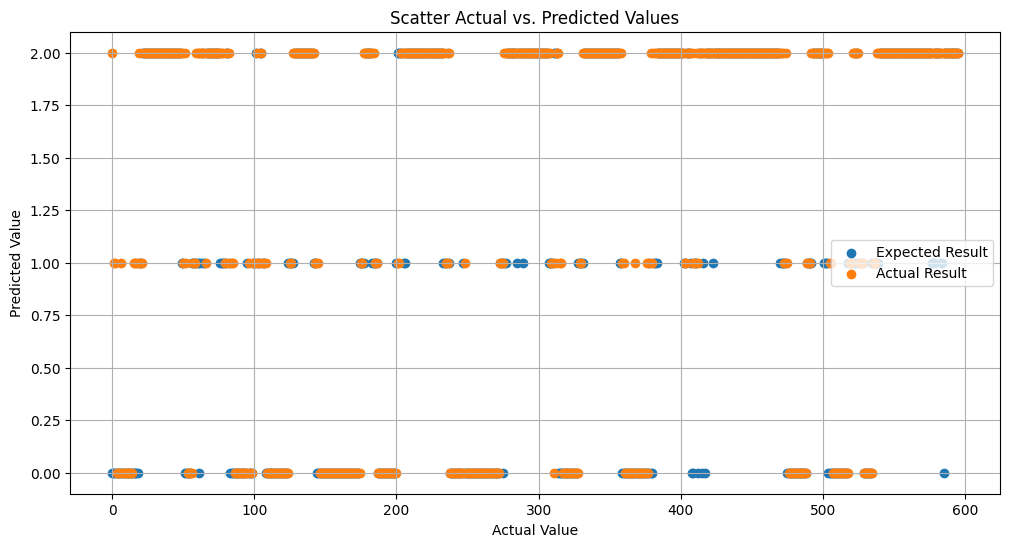

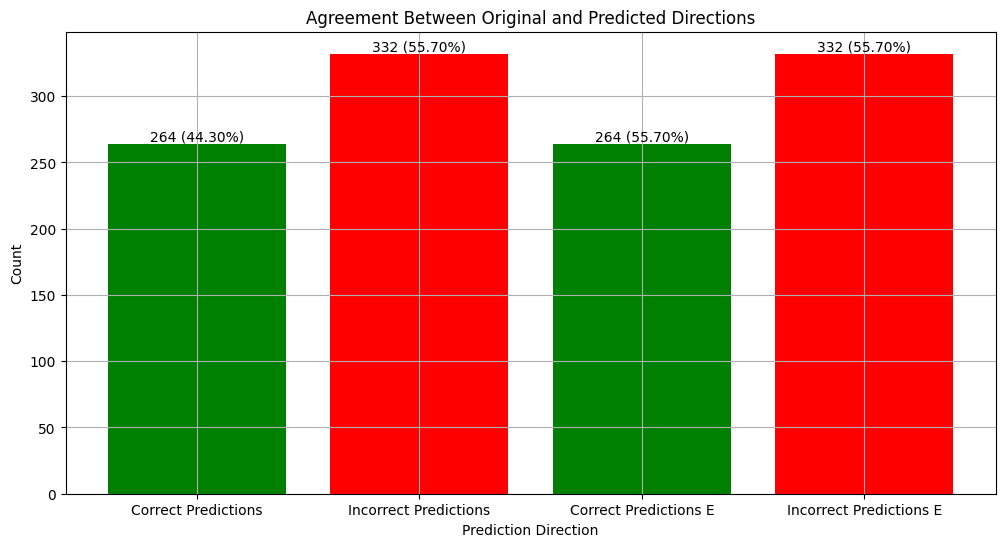

In [11]:
predictions = model.predict(x_predict)


y_predictions_classes = np.argmax(y_predict, axis=1)
predictions_classes = np.argmax(predictions, axis=1)

print(predictions)
print(predictions_classes)


plot_scatter_data(y_predictions_classes, predictions_classes)
plot_direction_comparison(y_predictions_classes, predictions_classes)